# 머신러닝을 활용한 학생 성적 예측 모델 제작
### - UCI Student Performance Dataset을 중심으로
#### 공주사대 컴퓨터교육과 2020500324 이진호

### 프로젝트 시작 배경
1. AI 리터러시 과목의 학기 말 프로젝트를 완수하기 위함.
2. 컴퓨터교육과 학생으로서 필수적으로 갖춰야 할 컴퓨팅 역량을 강화하기 위함.
3. 전공과 관련한 교육 데이터를 직접 분석하며 문제를 정보 기술 기반으로 해결하는 실무 능력을 배양하기 위함.

### 프로젝트 목표
1. 예측 점수에 대해 각 변수의 정략적 점수 기여도를 분해하여 출력하는 시스템을 구축하는 것.

### 데이터셋
1. UCI Machine Learning Repository - Student Performance Dataset
2. student-mat.scv
3. student-por.scv

### 전체 변수
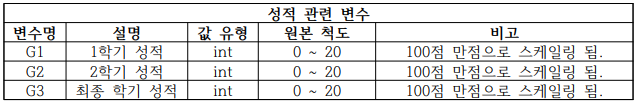
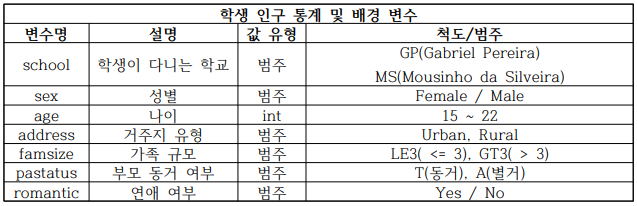
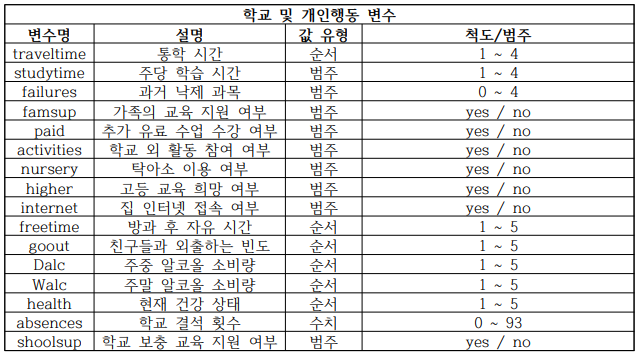

### <== 필수 라이브러리 임포트 ==>

In [1]:
#기존 파일을 참고한 코드

import pandas as pd  # 데이터 처리
import numpy as np  # 수치 계산
import matplotlib.pyplot as plt  #시각화
import seaborn as sns  #시각화

# 머신러닝 모델 구축과 평가
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("활용 라이브러리 임포트 완료.")

활용 라이브러리 임포트 완료.


### <== 데이터 로드 및 결합(df_combined 생성) ==>

In [2]:
#기존 파일을 참고한 코드

print("데이터 로드 및 결합")

#======== CSV 파일 결합
df_mat = pd.read_csv('student-mat.csv', delimiter=';')
df_por = pd.read_csv('student-por.csv', delimiter=';')
df_combined = pd.concat([df_mat, df_por], ignore_index=True)
#========

print(f"원본 Math 데이터 수: {len(df_mat)}")
print(f"원본 Portuguese 데이터 수: {len(df_por)}")
print(f"결합된 데이터 수: {len(df_combined)}")

print("\n결합된 데이터 Head:")
print(df_combined.head())

데이터 로드 및 결합
원본 Math 데이터 수: 395
원본 Portuguese 데이터 수: 649
결합된 데이터 수: 1044

결합된 데이터 Head:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


### <== 데이터 정보 확인 ==>

In [3]:
#기존 파일을 참고한 코드

print("데이터 정보 확인")

df_mat.info()
print("\n")
df_por.info()
print("\n")
df_combined.info() #통합 데이터 전체 구조 확인

데이터 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  

### <== 성적 컬럼(G1, G2, G3) 숫자형 변환 및 100점 만점 업스케일링 ==>

In [4]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

print("성적 컬럼 숫자형 변환")

#==========성적값 업스케일링
grade_cols = ['G1', 'G2', 'G3']
for col in grade_cols:
    if df_combined[col].dtype == 'object':
        df_combined[col] = df_combined[col].str.replace('"', '', regex=False)
    
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce').fillna(0)
    df_combined[col] = df_combined[col] * 5
#==========

print("G1, G2, G3 컬럼 타입:")
print(df_combined[grade_cols].dtypes)

print("\n")

print("G1, G2, G3 컬럼 타입 및 100점 만점 기준 데이터 확인:")
print(df_combined[grade_cols].head())

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

성적 컬럼 숫자형 변환
G1, G2, G3 컬럼 타입:
G1    int64
G2    int64
G3    int64
dtype: object


G1, G2, G3 컬럼 타입 및 100점 만점 기준 데이터 확인:
   G1  G2  G3
0  25  30  30
1  25  25  30
2  35  40  50
3  75  70  75
4  30  50  50


### <== 머신 러닝을 위한 X, y 정의 ==>

In [5]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

print("특성 공학 (One-Hot Encoding) 및 X/y 정의")

#==========One-Hot Encoding
df_model = pd.get_dummies(df_combined.drop(columns=['school']), drop_first=True)

X = df_model.drop(columns=['G3'])
y = df_model['G3']
#==========

print(f"모델 특성 개수: {X.shape[1]}개")

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

특성 공학 (One-Hot Encoding) 및 X/y 정의
모델 특성 개수: 40개


### <== 학습 전 시각화 - 수치형 변수 VS G3(Scatter Plot 출력) ==>

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

수치형 변수 vs G3 Scatter Plot 시각화


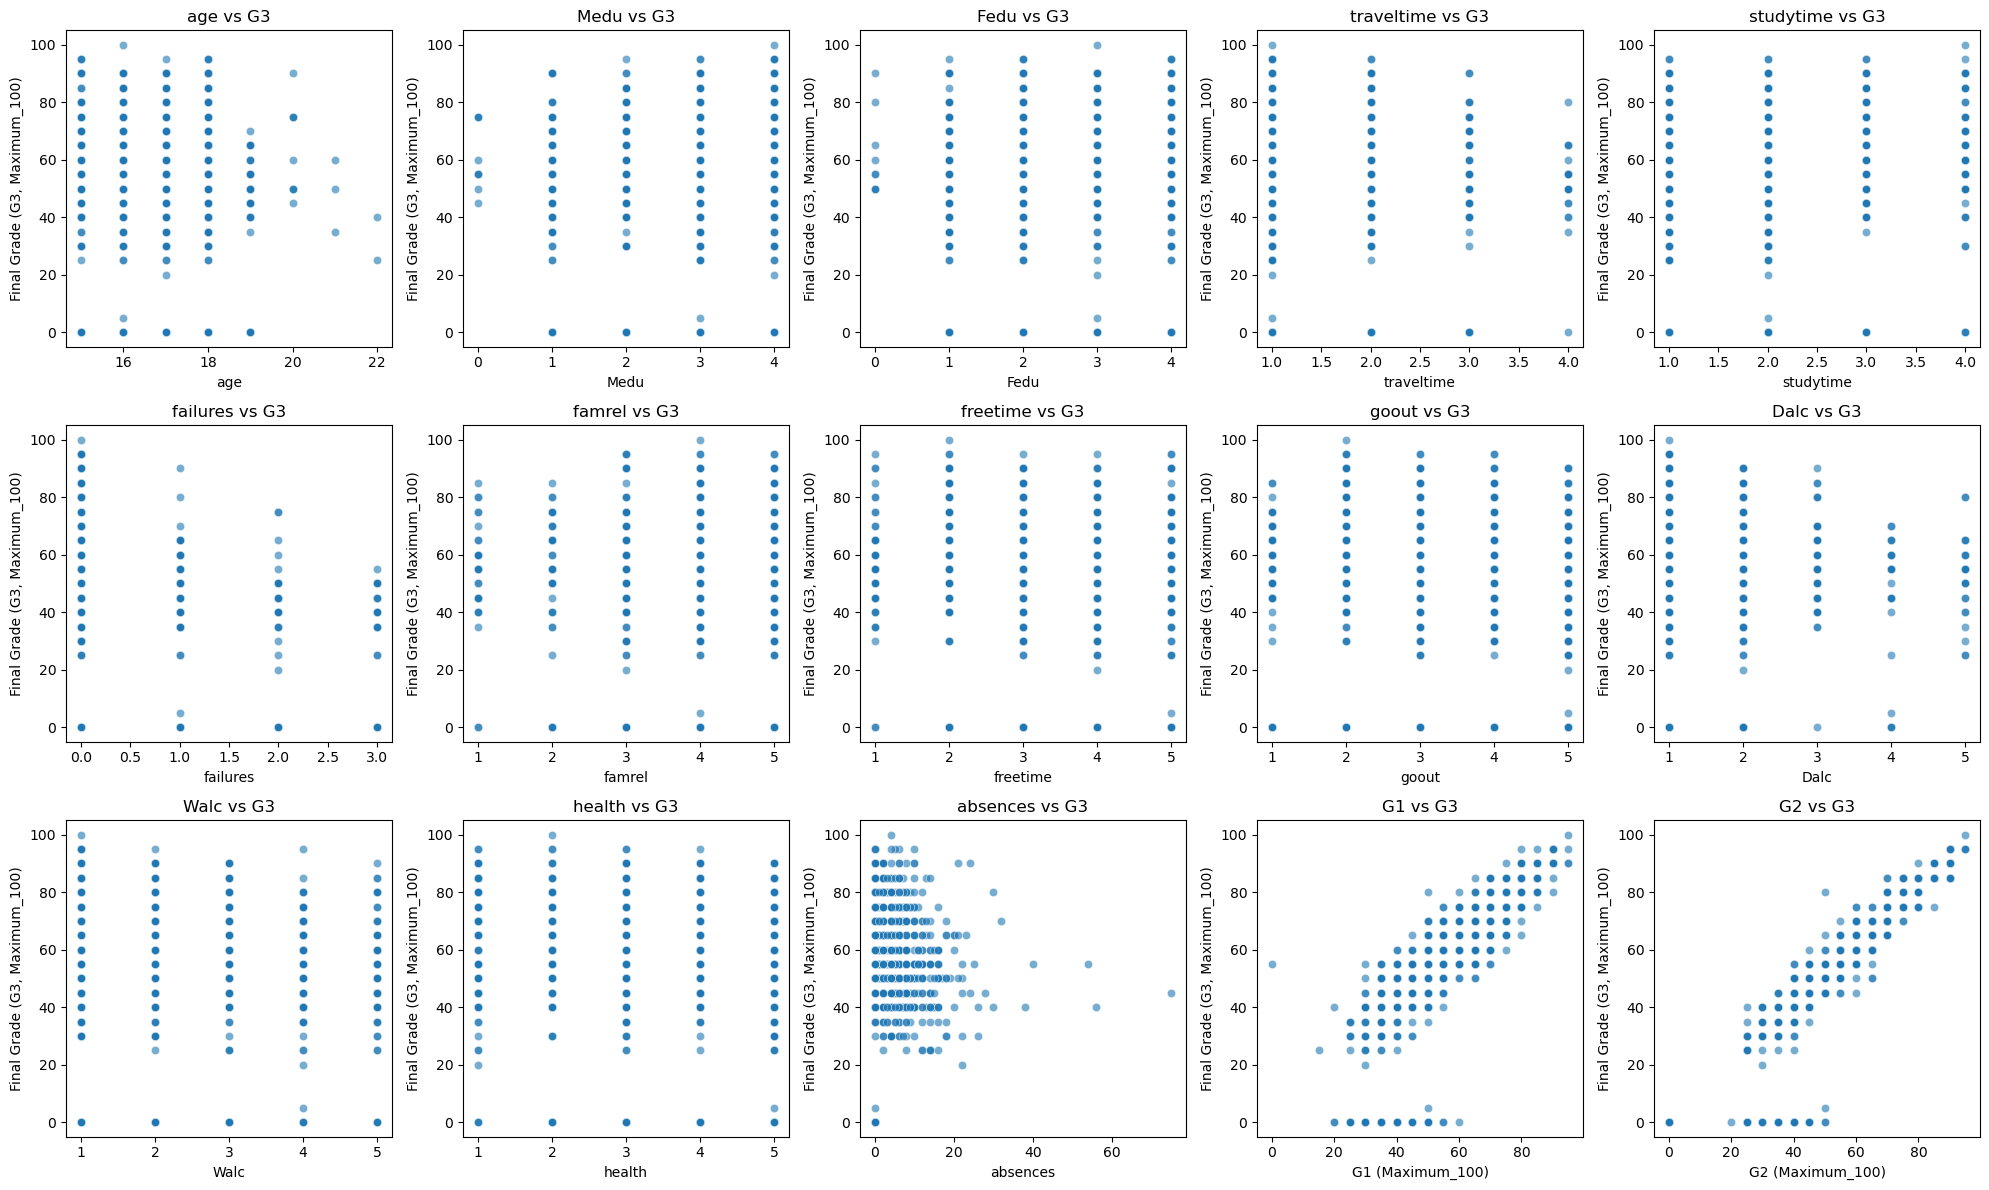

In [6]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

print("수치형 변수 vs G3 Scatter Plot 시각화")

#==========15개 수치형 변수 VS G3
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
target = 'G3'

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.scatterplot(x=col, y=target, data=df_combined, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} vs {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(f'Final Grade (G3, Maximum_100)')
    
    if col in ['G1', 'G2']:
        axes[i].set_xlabel(f'{col} (Maximum_100)')

file_name = 'Before scatter plot.pdf' 
plt.savefig(file_name)
file_name = 'Before scatter plot.png' 
plt.savefig(file_name)

plt.tight_layout()
plt.show()
#==========

### <== 학습 전 시각화 - 범주형 변수 VS G3(Box Plot 출력) ==>

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

범주형 변수 vs G3 Box Plot 시각화


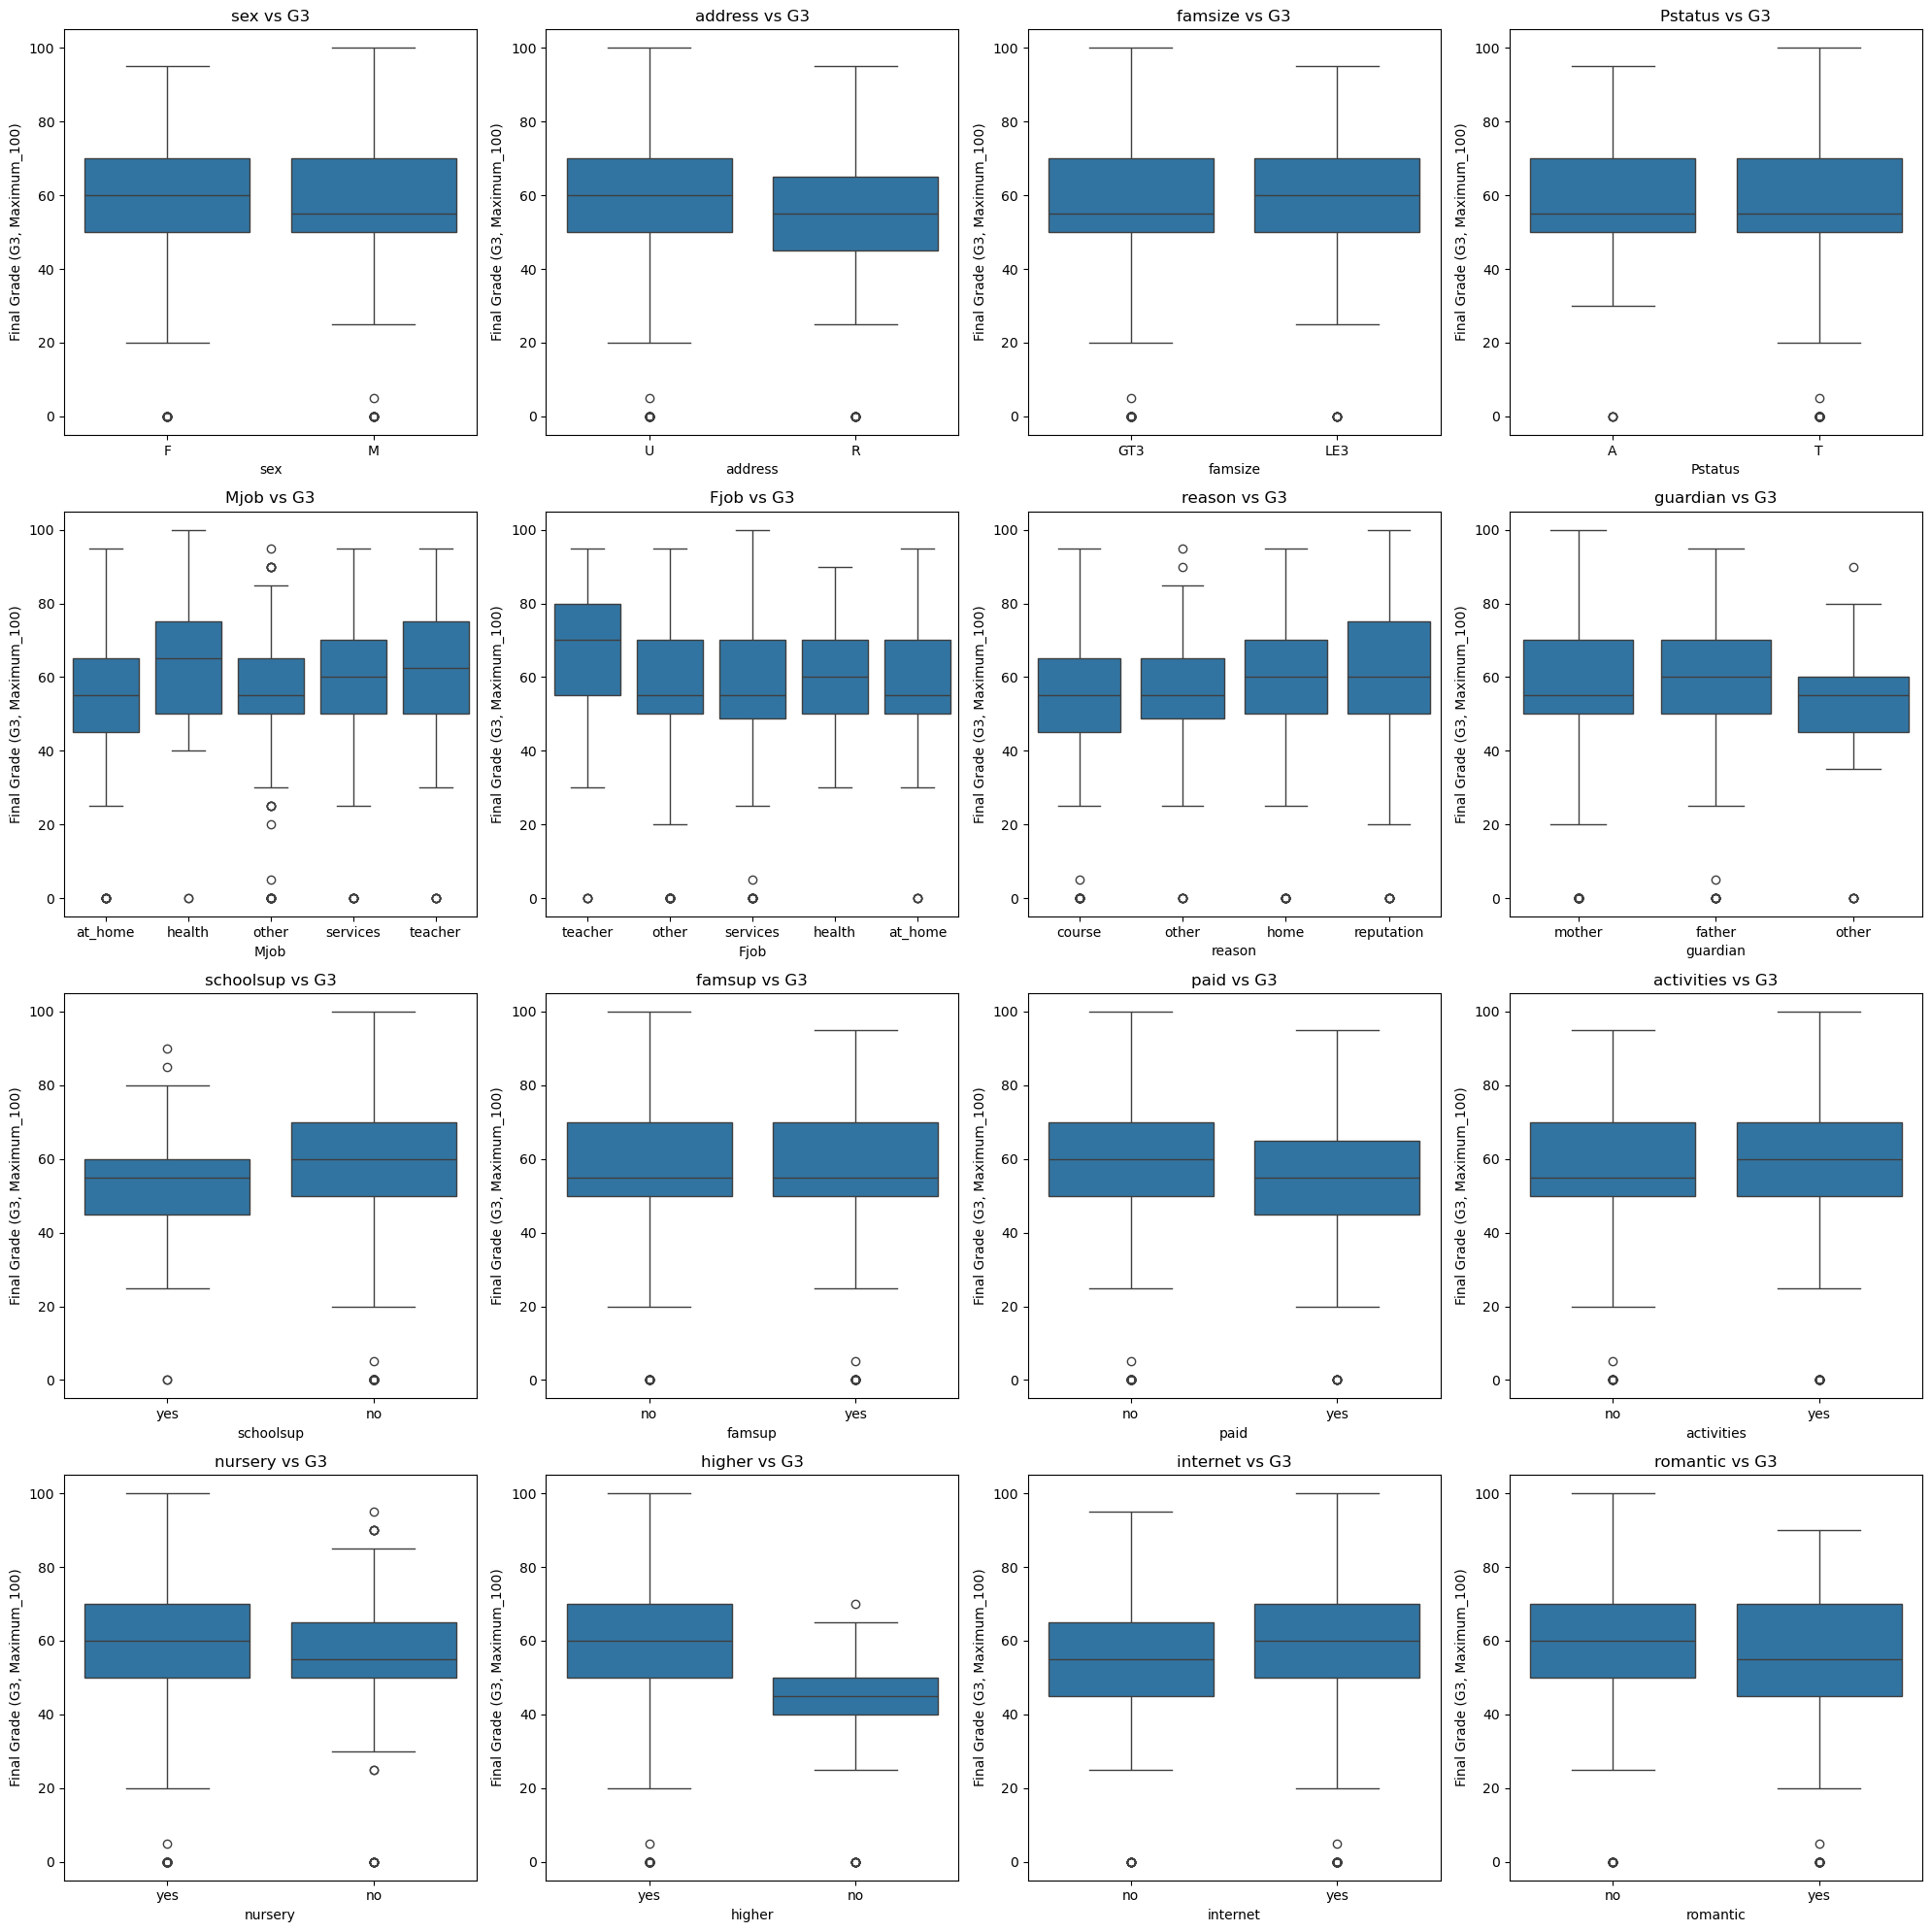

In [7]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

print("범주형 변수 vs G3 Box Plot 시각화")

#==========16개 범주형 변수 VS G3
categorical_features = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
target = 'G3'

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.boxplot(x=col, y=target, data=df_combined, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(f'Final Grade (G3, Maximum_100)')

file_name = 'Before box plot.pdf' 
plt.savefig(file_name)
file_name = 'Before box plot.png' 
plt.savefig(file_name)
plt.tight_layout()
plt.show()
#===========

### <== 데이터 분리 및 선형 회귀 모델 학습 ==>

In [8]:
#기존 파일을 참고한 코드

print("데이터 분리 및 선형 회귀 모델 학습")

#==========데이터 분리 학습/테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)  
#, random_state=번호를 넣으면 결과의 재연 가능(보고서 작성을 위해 불가피하게 고정하였음.)
#==========

#==========선형회귀 모델 객체 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)
#==========

#==========테스트 및 성능 평가
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
#==========

print("모델 학습 완료.")
print(f"Test Set RMSE: {rmse:.2f}")
print(f"Test Set R-squared (R2): {r2:.2f}")
print("선형 회귀 모델의 점수(Train): ", round(model.score(X_train, y_train), 3))
print("선형 회귀 모델의 점수(Test): ", round(model.score(X_test, y_test), 3))

데이터 분리 및 선형 회귀 모델 학습
모델 학습 완료.
Test Set RMSE: 6.26
Test Set R-squared (R2): 0.91
선형 회귀 모델의 점수(Train):  0.82
선형 회귀 모델의 점수(Test):  0.906


### <== 모델 학습 결과 시각화 - 실제 VS 예측 G3 (Scatter Plot 출력) ==>

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

실제 G3 vs. 예측 G3 Scatter Plot 시각화


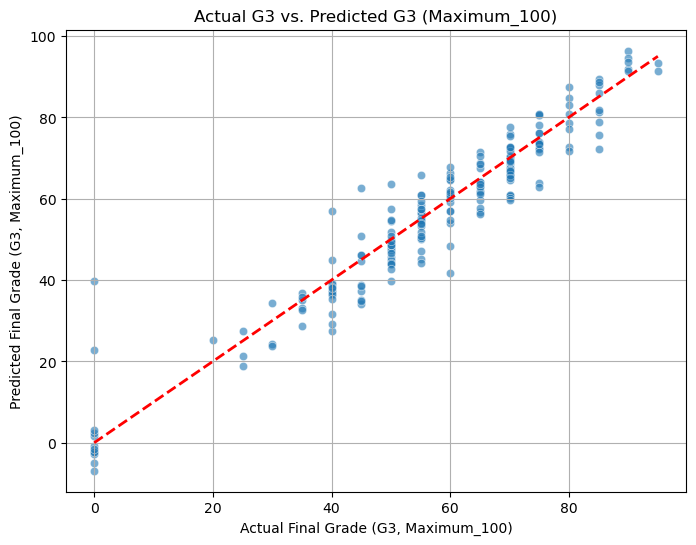

In [9]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

print("실제 G3 vs. 예측 G3 Scatter Plot 시각화")

plt.figure(figsize=(8, 6))
#==========실제 G3 VS 예측 G3 산점도 y = x
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
#==========
plt.title('Actual G3 vs. Predicted G3 (Maximum_100)')
plt.xlabel('Actual Final Grade (G3, Maximum_100)')
plt.ylabel('Predicted Final Grade (G3, Maximum_100)')
plt.grid(True)

file_name = 'After scatter plot.pdf' 
plt.savefig(file_name)
file_name = 'After scatter plot.png' 
plt.savefig(file_name)
plt.show()

### <== 모델 학습 결과 시각화 - 상위 10개 특성 계수 (Bar Plot 출력) ==>

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

상위 10개 특성 계수 Bar Plot 시각화 및 모든 계수 텍스트 출력


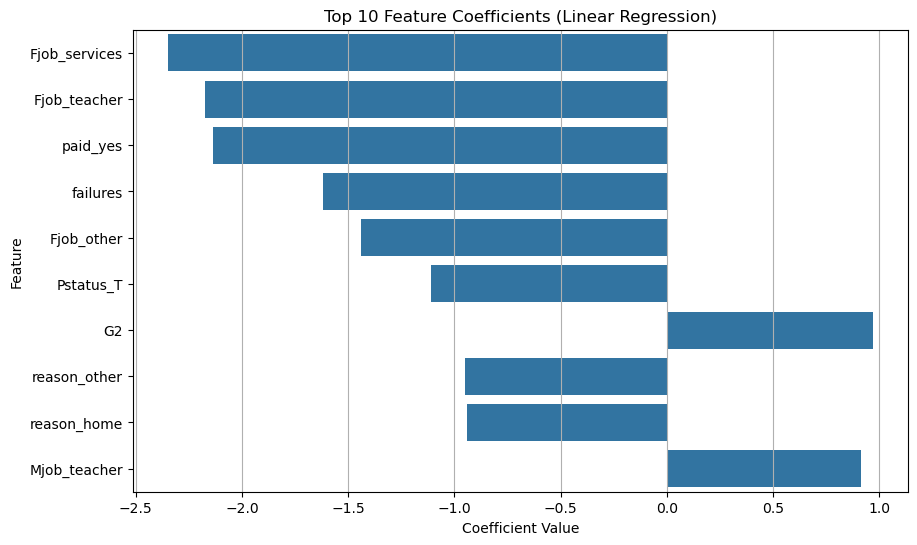


모든 특성 계수 (절댓값 크기 순 정렬)
[Fjob_services     ] 계수:    -2.3475, 절댓값: 2.3475
[Fjob_teacher      ] 계수:    -2.1751, 절댓값: 2.1751
[paid_yes          ] 계수:    -2.1346, 절댓값: 2.1346
[failures          ] 계수:    -1.6195, 절댓값: 1.6195
[Fjob_other        ] 계수:    -1.4406, 절댓값: 1.4406
[Pstatus_T         ] 계수:    -1.1113, 절댓값: 1.1113
[G2                ] 계수:     0.9691, 절댓값: 0.9691
[reason_other      ] 계수:    -0.9509, 절댓값: 0.9509
[reason_home       ] 계수:    -0.9409, 절댓값: 0.9409
[Mjob_teacher      ] 계수:     0.9153, 절댓값: 0.9153
[famsup_yes        ] 계수:     0.8821, 절댓값: 0.8821
[Mjob_services     ] 계수:     0.8686, 절댓값: 0.8686
[nursery_yes       ] 계수:    -0.7744, 절댓값: 0.7744
[famrel            ] 계수:     0.7723, 절댓값: 0.7723
[schoolsup_yes     ] 계수:     0.7697, 절댓값: 0.7697
[traveltime        ] 계수:     0.7558, 절댓값: 0.7558
[reason_reputation ] 계수:    -0.7214, 절댓값: 0.7214
[Mjob_health       ] 계수:     0.6893, 절댓값: 0.6893
[Fjob_health       ] 계수:    -0.5956, 절댓값: 0.5956
[sex_M             ] 계수:    -0.5595, 절댓값: 0.5

In [10]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

print("상위 10개 특성 계수 Bar Plot 시각화 및 모든 계수 텍스트 출력")

#==========데이터 프레임 생성 및 정렬
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])

coefficients_sorted_all = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
#==========

coefficients_top10 = coefficients_sorted_all.head(10)

#==========상위 10개 특성 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_top10)
#==========

plt.title('Top 10 Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x')

file_name = 'After bar plot.pdf'
plt.savefig(file_name)
file_name = 'After bar plot.png'
plt.savefig(file_name)
plt.show()

print("\n" + "="*60)
print("모든 특성 계수 (절댓값 크기 순 정렬)")
print("="*60)
for index, row in coefficients_sorted_all.iterrows():
    print(f"[{row['Feature']:<18}] 계수: {row['Coefficient']:10.4f}, 절댓값: {row['Abs_Coefficient']:.4f}")
print("="*60 + "\n")

### <== 사용자 입력 G1, G2 성적을 이용한 최종 예측(실행) ==>

In [11]:
#직접 작성한 코드
print("Written By 진구 이선생(Lee Jin-ho)\nDepartment of Computer Education, College of Educaton, KNU\n")

#==========예측 필요 5개 핵심 특성 정의 및 추출
REQUIRED_FEATURES = ['G1', 'G2', 'sex_M', 'failures', 'absences']
COEFFICIENTS = {}
#==========

INTERCEPT = 0.0


INTERCEPT = model.intercept_

for feature in REQUIRED_FEATURES:
    if feature in X.columns:
        feature_index = X.columns.get_loc(feature)
        COEFFICIENTS[feature] = model.coef_[feature_index]
    else:
        raise KeyError(f"모델 특성 목록에서 '{feature}' 컬럼을 찾을 수 없습니다.")
            
print("모델 파라미터 (100점 만점 기준) 추출 성공.")

#==========변수값 * 계수 = 기여도 함수
def predict_final_grade(**kwargs):
    total_contribution = INTERCEPT
    contributions = {'Intercept': INTERCEPT}

    for feature in REQUIRED_FEATURES:
        value = kwargs[feature]
        coef = COEFFICIENTS[feature]
        contribution = coef * value
        total_contribution += contribution
        contributions[feature] = contribution
        
    final_g3 = np.clip(total_contribution, 0, 100)
    
    return final_g3, contributions
#==========


# -------------------------------------------------------------
# 사용자 입력 및 예측 결과 출력
# -------------------------------------------------------------
print("\n10. 최종 예측 프로그램 실행 (6가지 변수 입력)")

#==========사용자 입력 코드 블록
try:
    input_g1 = float(input("G1 성적을 입력하세요 (0~100): "))
    input_g2 = float(input("G2 성적을 입력하세요 (0~100): "))

    if not (0 <= input_g1 <= 100 and 0 <= input_g2 <= 100):
         raise ValueError("G1, G2 성적은 0에서 100 사이의 값으로 입력해야 합니다.")

    input_sex = input("성별을 입력하세요 (남성: M, 여성: F): ").upper()
    input_sex_m = 1 if input_sex == 'M' else 0
    if input_sex not in ['M', 'F']:
         raise ValueError("성별은 'M' 또는 'F'로 입력해야 합니다.")
        
    input_failures = int(input("낙제 과목 수(failures)를 입력하세요 (0~4): "))
    if not (0 <= input_failures <= 4):
         raise ValueError("낙제 과목 수는 0에서 4 사이의 값으로 입력해야 합니다.")
         

    input_absences = int(input("결석 횟수(absences)를 입력하세요 (0 이상 정수): "))
    if input_absences < 0:
         raise ValueError("결석 횟수는 0 이상의 정수로 입력해야 합니다.")

    inputs = {
        'G1': input_g1, 'G2': input_g2, 
        'sex_M': input_sex_m, 
        'failures': input_failures, 'absences': input_absences
    }
    final_prediction, contributions = predict_final_grade(**inputs)

    print("\n" + "=" * 60)
    print("최종 성적 (G3) 예측 과정 분석 (100점 만점 기준)")
    print("=" * 60)
    
    raw_sum = 0
    
    intercept_val = contributions.pop('Intercept')
    raw_sum += intercept_val
    print(f"1. 기본 점수 (절편/Intercept): {intercept_val:10.2f}점")

    sorted_features = ['G1', 'G2'] + [f for f in REQUIRED_FEATURES if f not in ['G1', 'G2']]

    for feature_name in sorted_features:
        contribution = contributions[feature_name]
        input_val = inputs[feature_name]
        coef_val = COEFFICIENTS[feature_name]
        raw_sum += contribution
        
        if feature_name == 'sex_M':
            label_name = "성별"
            input_display = "남성(1)" if input_sex_m == 1 else "여성(0)"
        elif feature_name == 'failures':
            label_name = "낙제 과목 수"
            input_display = f"{input_val}회"
        elif feature_name == 'absences':
            label_name = "결석 횟수"
            input_display = f"{input_val}회"
        elif feature_name == 'G1':
            label_name = "G1 성적"
            input_display = f"{input_val:.1f}점"
        elif feature_name == 'G2':
            label_name = "G2 성적"
            input_display = f"{input_val:.1f}점"
        else:
            label_name = feature_name
            input_display = str(input_val)

        print(f"{i}. {label_name:<11} 기여도 ({input_display:}): {contribution:10.2f}점")
        i += 1
        
    print("-" * 60)
    print(f"최종 합산 (제한값 적용 전 G3 예측 점수): {raw_sum:10.2f}점")

    print("\n" + "*" * 60)
    print(f"최종 예측 성적 (G3): {final_prediction:.2f}점")
    print("!주의! +- 6점 정도의 오차 존재")
    if final_prediction != raw_sum:
         print("   (성적은 0점에서 100점 사이로 제한되었습니다.)")
    print("*" * 60)

except ValueError as e:
    print(f"오류: {e}")
except Exception as e:
    print(f"처리 중 예상치 못한 오류 발생: {e}")
#==========

Written By 진구 이선생(Lee Jin-ho)
Department of Computer Education, College of Educaton, KNU

모델 파라미터 (100점 만점 기준) 추출 성공.

10. 최종 예측 프로그램 실행 (6가지 변수 입력)


G1 성적을 입력하세요 (0~100):  80
G2 성적을 입력하세요 (0~100):  71
성별을 입력하세요 (남성: M, 여성: F):  M
낙제 과목 수(failures)를 입력하세요 (0~4):  2
결석 횟수(absences)를 입력하세요 (0 이상 정수):  0



최종 성적 (G3) 예측 과정 분석 (100점 만점 기준)
1. 기본 점수 (절편/Intercept):      -3.02점
15. G1 성적       기여도 (80.0점):      11.04점
16. G2 성적       기여도 (71.0점):      68.80점
17. 성별          기여도 (남성(1)):      -0.56점
18. 낙제 과목 수     기여도 (2회):      -3.24점
19. 결석 횟수       기여도 (0회):       0.00점
------------------------------------------------------------
최종 합산 (제한값 적용 전 G3 예측 점수):      73.03점

************************************************************
최종 예측 성적 (G3): 73.03점
!주의! +- 6점 정도의 오차 존재
************************************************************
